In [2]:

import tensorflow as tf
from tensorflow.keras.layers import Layer
from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout,Activation
from tensorflow.keras.optimizers import RMSprop,Adam

In [37]:

class BandW(Layer):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)
        (x_train, y_train), (x_test, y_test) = mnist.load_data()
        resha= x_train[0] # primera imagen
        im=np.reshape(x_train[0],(28,28))
        resha=np.reshape(im,(784,1)) #La reacomodamos como matriz de (784,1) para poderla meter a la red
        imtest= x_train[2] #Leemos nuestra imagen
        plt.imshow(x_train[2]) #La visualizamos
        x_train[2] = np.reshape(x_train[2], (28, 28)) # La convertimos en vector
            #Convertimos a blanco y negro la imagen:
        lst = []
        for i in x_train[2]:
            pix=i[0]*0.299+i[1]*0.587+i[2]*0.114#transfomamos a escala de grises, aquí dependiendo el valor con el que escalamos, es la tonalidad de grises
        if(pix<125):
            pix=0. #Como la hoja es blanca y el papel negro, lo negro lo ponemos con mayor luminosidad
        else:
            pix=0. #lo blanco lo ponemos como negro
            lst.append(pix)
            x_train[2]=np.array(lst).reshape(1,28,28,3) #acomodamos la imagen para poder ver como quedó
            imtest=(x_train[2]/x_train[2].max()) #normalizamos
            plt.imshow(x_train[2]) #visualizamos la imagen

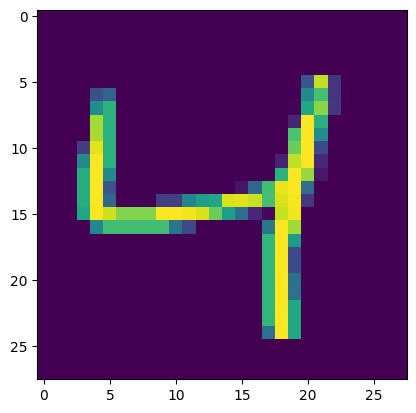

In [39]:
model_capgris=BandW()

La verdad no entiendo, me sale igual y no me marca error

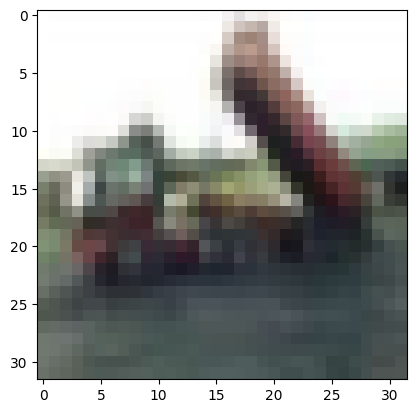

In [41]:

from tensorflow.keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
plt.imshow(x_train[2])

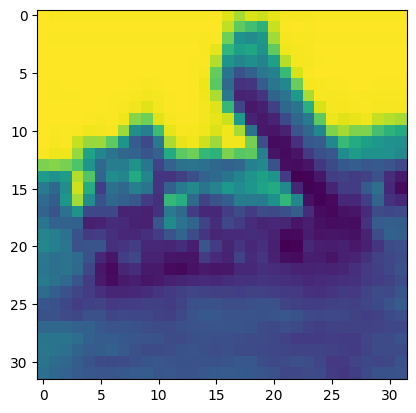

In [42]:

imgbw = x_train[2].copy()
temp = np.zeros((32, 32))
for i in range(0, 32):
    for j in range(0, 32):
        temp[i][j] = round(sum(imgbw[i][j])/(3))
plt.imshow(temp)


from tensorflow.python.ops.numpy_ops import np_config
np_config.enable_numpy_behavior()

class BandW(Layer):
    def __init__(self, num_outputs=1):
        super(BandW, self).__init__()
        self.num_outputs = num_outputs

    def call(self, inputs):
        inputs = inputs.astype("uint32")
        shape = inputs.shape
        numimg = shape[0]
        imgsize = (shape[0], shape[1])

        bwimg = np.zeros((32, 32))
        for i in range(0, 32):
            for j in range(0, 32):
                bwimg[i][j] = round(sum(inputs[i][j])/(3))

        return bwimg

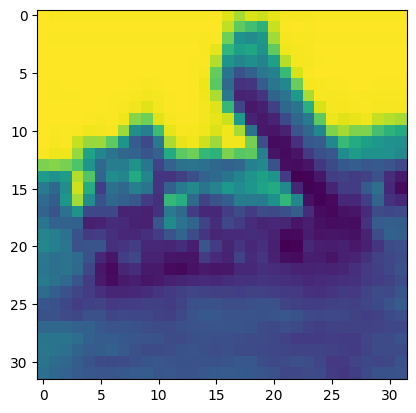

In [43]:
plt.imshow(BandW()(x_train[2]))